# Q&A Activity Question Week -10
Do the following on the dataset
1. Load the data into the pandas environment and identify some basic details of the
dataset.
2. Reset the index as "name" as the index.
3. Select rows for specific names Jack Morgan and Josh wills.
4. Select data for multiple values "Sales" and “Finance”.
5. Display employee who has more than 700 performance score.
6. Display employee who has more than 500 and less than 700 performance score
7. Check and handle missing values in the dataset.
8. Check the outliers and handle outliers in performance score using Percentiles.
9. Check the gender column and do Dummy encoding.
10.Do the standard scaling on the feature performance score

In [163]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

## 1)-Load the data into the pandas environment and identify some basic details of the dataset.

In [164]:
data = pd.read_csv('employee.csv')

In [165]:
data.head()

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


In [166]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


In [167]:
data.describe(include='all')

,name,age,income,gender,department,grade,performance_score
count,9,7.000000,7.000000,7,9,9,9.000000
unique,9,NaN,NaN,2,3,4,NaN
top,Allen Smith,NaN,NaN,F,Operations,G3,NaN
freq,1,NaN,NaN,5,3,5,NaN
mean,NaN,40.428571,52857.142857,NaN,NaN,NaN,610.666667
std,NaN,12.204605,26028.372797,NaN,NaN,NaN,235.671912
min,NaN,23.000000,16000.000000,NaN,NaN,NaN,53.000000
25%,NaN,31.000000,38500.000000,NaN,NaN,NaN,556.000000
50%,NaN,45.000000,52000.000000,NaN,NaN,NaN,674.000000
75%,NaN,49.500000,63500.000000,NaN,NaN,NaN,711.000000


In [168]:
data.isna().sum()

name                 0
age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [169]:
data.shape

(9, 7)

## 2)-Reset the index as "name" as the index.

In [170]:
data = pd.read_csv('employee.csv', index_col="name")

In [171]:
data.head()

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


In [172]:
data.shape

(9, 6)

## 3)-Select rows for specific names Jack Morgan and Josh wills.

In [173]:
data.loc[['Jack Morgan','Josh Wills']]

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


## 4)-Select data for multiple values "Sales" and “Finance”.

In [174]:
data[data["department"].isin(["Sales", "Finance"])]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


## 5)-Display employee who has more than 700 performance score.

In [175]:
data[data['performance_score']>700]

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


## 6)-Display employee who has more than 500 and less than 700 performance score.

In [176]:
data[(data['performance_score']>500) & (data['performance_score']<700)]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


## 7)-Check and handle missing values in the dataset.

In [177]:
data.isna().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [178]:
data.dtypes

age                  float64
income               float64
gender                object
department            object
grade                 object
performance_score      int64
dtype: object

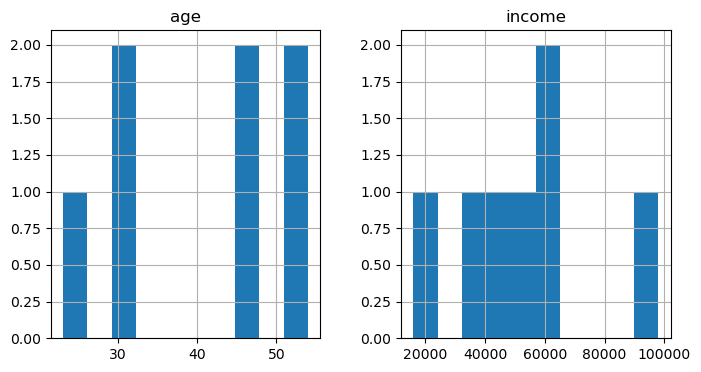

In [179]:
#check for skewness
freqgraph = data.select_dtypes(include='float')
freqgraph.hist(figsize=(8,4))
plt.show()

In [180]:
data.describe()

,age,income,performance_score
count,7.000000,7.000000,9.000000
mean,40.428571,52857.142857,610.666667
std,12.204605,26028.372797,235.671912
min,23.000000,16000.000000,53.000000
25%,31.000000,38500.000000,556.000000
50%,45.000000,52000.000000,674.000000
75%,49.500000,63500.000000,711.000000
max,54.000000,98000.000000,901.000000


In [181]:
data.columns

Index(['age', 'income', 'gender', 'department', 'grade', 'performance_score'], dtype='object')

In [182]:
#filling age column with the median
data['age']=data['age'].fillna(data['age'].median())

#filling income column with the median
data['income']=data['income'].fillna(data['income'].median())

#filling gender column with the mode
data['gender']=data['gender'].fillna(data['gender'].mode()[0])

data.isna().sum()

age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

In [183]:
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,F,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,45.0,62000.0,F,Sales,G3,649
James Authur,54.0,52000.0,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


## 8)-Check the outliers and handle outliers in performance score using Percentiles.

In [184]:
data.columns

Index(['age', 'income', 'gender', 'department', 'grade', 'performance_score'], dtype='object')

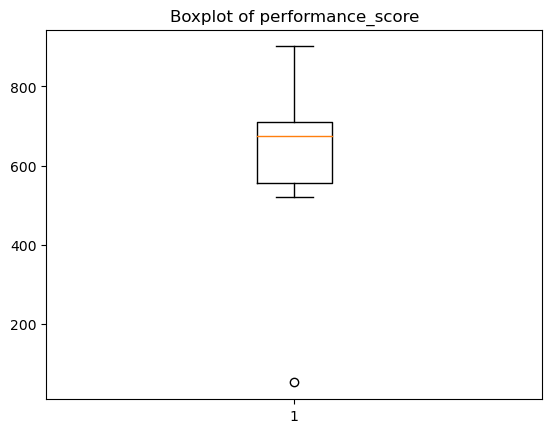

In [185]:
#we will use boxplot to check for outliers
plt.boxplot(data['performance_score'])
plt.title('Boxplot of performance_score')
plt.show()

In [186]:
Q1 = np.percentile(data['performance_score'], 25, interpolation='midpoint')
Q2 = np.percentile(data['performance_score'], 50, interpolation='midpoint')
Q3 = np.percentile(data['performance_score'], 75, interpolation='midpoint')

#find the interquartile range
IQR = Q3-Q1

#find upper limit and lower limit
low_limit = Q1-1.5*IQR
up_limit = Q3+1.5*IQR

print('Lower limit is :',low_limit)
print('Upper limit is :',up_limit)

Lower limit is : 323.5
Upper limit is : 943.5


In [187]:
#find the outliers
outlier=[]
for x in data['performance_score']:
    if((x<low_limit) or (x>up_limit)):
        outlier.append(x)
        
print(outlier)

[53]


In [188]:
#locate the indexes of outliers

ind1 = (data['performance_score']<low_limit)
ind1 = data.loc[ind1].index

In [200]:
#replacing outlier with median
data.loc[list(ind1),'performance_score']=data['performance_score'].median()
data

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,F,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,45.0,62000.0,F,Sales,G3,649
James Authur,54.0,52000.0,F,Operations,G3,674
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


From the data set, there is only one outlier in performance score Which might be an experimental error because all other individuals have performance score greater than 500, also the found out individual has a higher G3 grade with an income of 52000. So we replaced that outlier with median of the performance score.

## 9)-Check the gender column and do Dummy encoding.

In [190]:
data.gender.nunique()

2

In [191]:
data1 = pd.get_dummies(data,columns=['gender'])
data1.head()

,age,income,department,grade,performance_score,gender_F,gender_M
name,,,,,,,
Allen Smith,45.0,52000.0,Operations,G3,723,1,0
S Kumar,45.0,16000.0,Finance,G0,520,1,0
Jack Morgan,32.0,35000.0,Finance,G2,674,0,1
Ying Chin,45.0,65000.0,Sales,G3,556,1,0
Dheeraj Patel,30.0,42000.0,Operations,G2,711,1,0


## 10)-Do the standard scaling on the feature performance score

In [192]:
data1.columns

Index(['age', 'income', 'department', 'grade', 'performance_score', 'gender_F',
       'gender_M'],
      dtype='object')

In [193]:
#split the data
y = data1['performance_score']
x = data1.drop(['performance_score','department','grade'], axis=1)

#split it into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42, test_size=0.2)

#splitting is done. Now we need to create the linear model
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(x_train, y_train)
predictions = model.predict(x_test)

#check the MSE of the model
from sklearn.metrics import mean_squared_error
print('MSE is :', mean_squared_error(y_test,predictions))

MSE is : 47140.39282885155


In [194]:
x.describe()

,age,income,gender_F,gender_M
count,9.000000,9.000000,9.000000,9.000000
mean,41.444444,52666.666667,0.777778,0.222222
std,10.760008,22544.400635,0.440959,0.440959
min,23.000000,16000.000000,0.000000,0.000000
25%,32.000000,42000.000000,1.000000,0.000000
50%,45.000000,52000.000000,1.000000,0.000000
75%,45.000000,62000.000000,1.000000,0.000000
max,54.000000,98000.000000,1.000000,1.000000


In [201]:
type(x)

pandas.core.frame.DataFrame

In [196]:
#Standard scaling
from sklearn import preprocessing
standardisation = preprocessing.StandardScaler()
scaled = standardisation.fit_transform(data1[['performance_score']])
data1['performance_score']=scaled

In [197]:
data1 = pd.DataFrame(data1)

In [198]:
data1

,age,income,department,grade,performance_score,gender_F,gender_M
name,,,,,,,
Allen Smith,45.0,52000.0,Operations,G3,0.422890,1,0
S Kumar,45.0,16000.0,Finance,G0,-1.558187,1,0
Jack Morgan,32.0,35000.0,Finance,G2,-0.055301,0,1
Ying Chin,45.0,65000.0,Sales,G3,-1.206863,1,0
Dheeraj Patel,30.0,42000.0,Operations,G2,0.305782,1,0
Satyam Sharma,45.0,62000.0,Sales,G3,-0.299276,1,0
James Authur,54.0,52000.0,Operations,G3,-0.055301,1,0
Josh Wills,54.0,52000.0,Finance,G3,2.159992,1,0
Leo Duck,23.0,98000.0,Sales,G4,0.286264,0,1


In [199]:
#split the data
y = data1['performance_score']
x = data1.drop(['performance_score','department','grade'], axis=1)

#split it into train and test
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42, test_size=0.2)

#splitting is done. Now we need to create the linear model
from sklearn import linear_model
lr = linear_model.LinearRegression()
model = lr.fit(x_train, y_train)
predictions = model.predict(x_test)

#check the MSE of the model
from sklearn.metrics import mean_squared_error
print('MSE is :', mean_squared_error(y_test,predictions))

MSE is : 4.489561221795386


here from the MSE value, it is clear that Standard Scaling has significant effect on the model.